In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
#数据来源：https://tianchi.aliyun.com/dataset/88346?spm=a2c22.28136470.0.0.13064a0armIQ0R&from=search-list
data = pd.read_csv("./data.csv")
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
data.shape

(569, 33)

In [5]:
data.drop_duplicates(inplace=True) #去除重复值
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
#监测缺失值
#缺失值处理
data.isna().sum() 
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [7]:
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

In [8]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
X = data[data.columns[1:]]
Y = data[data.columns[:1]]

[NbConvertApp] Converting notebook plotting.ipynb to python
[NbConvertApp] Writing 3558 bytes to plotting.py


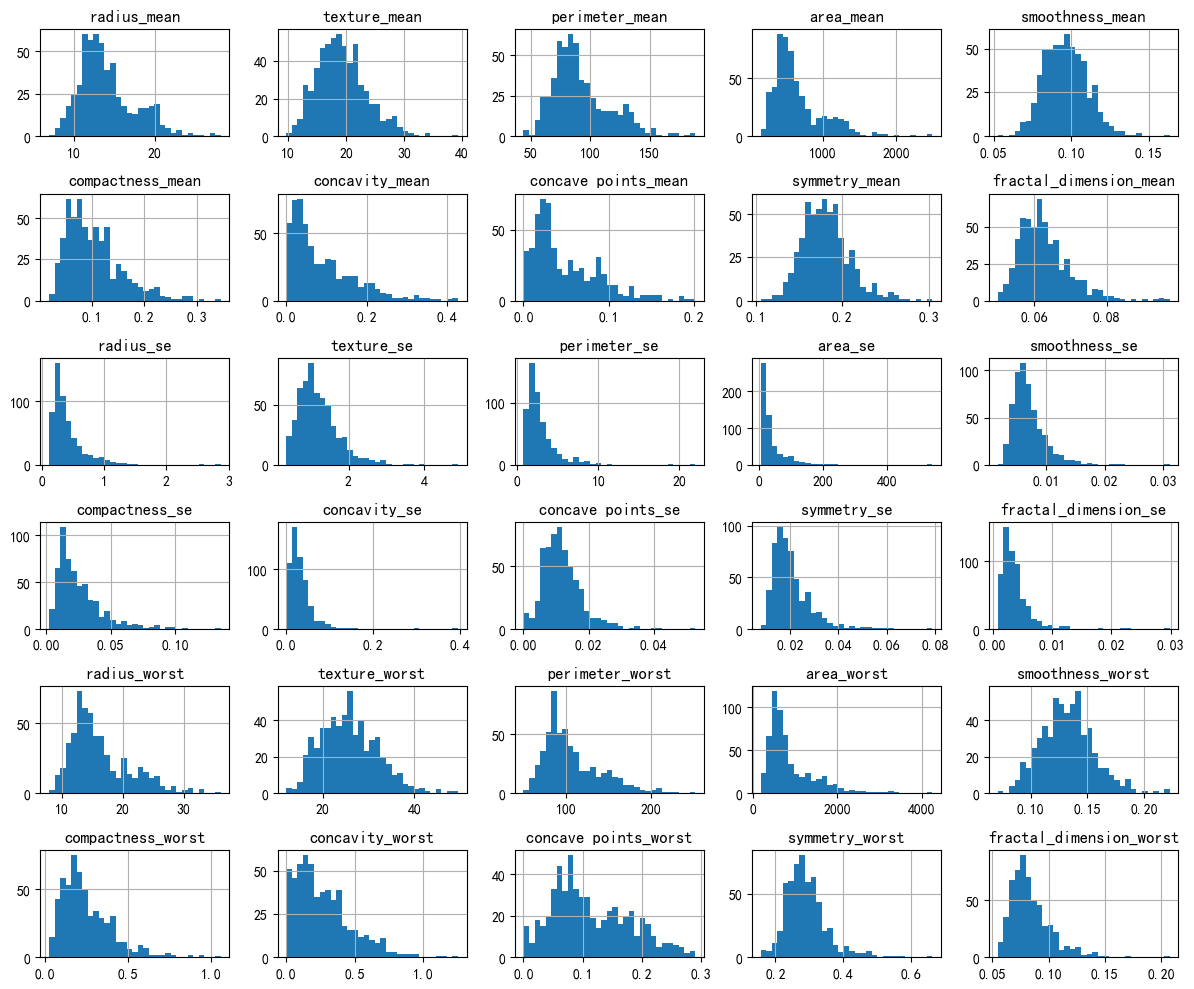

In [10]:
from plotting import *
X_plot = dataplotshow(X)
X_plot.histplotting()

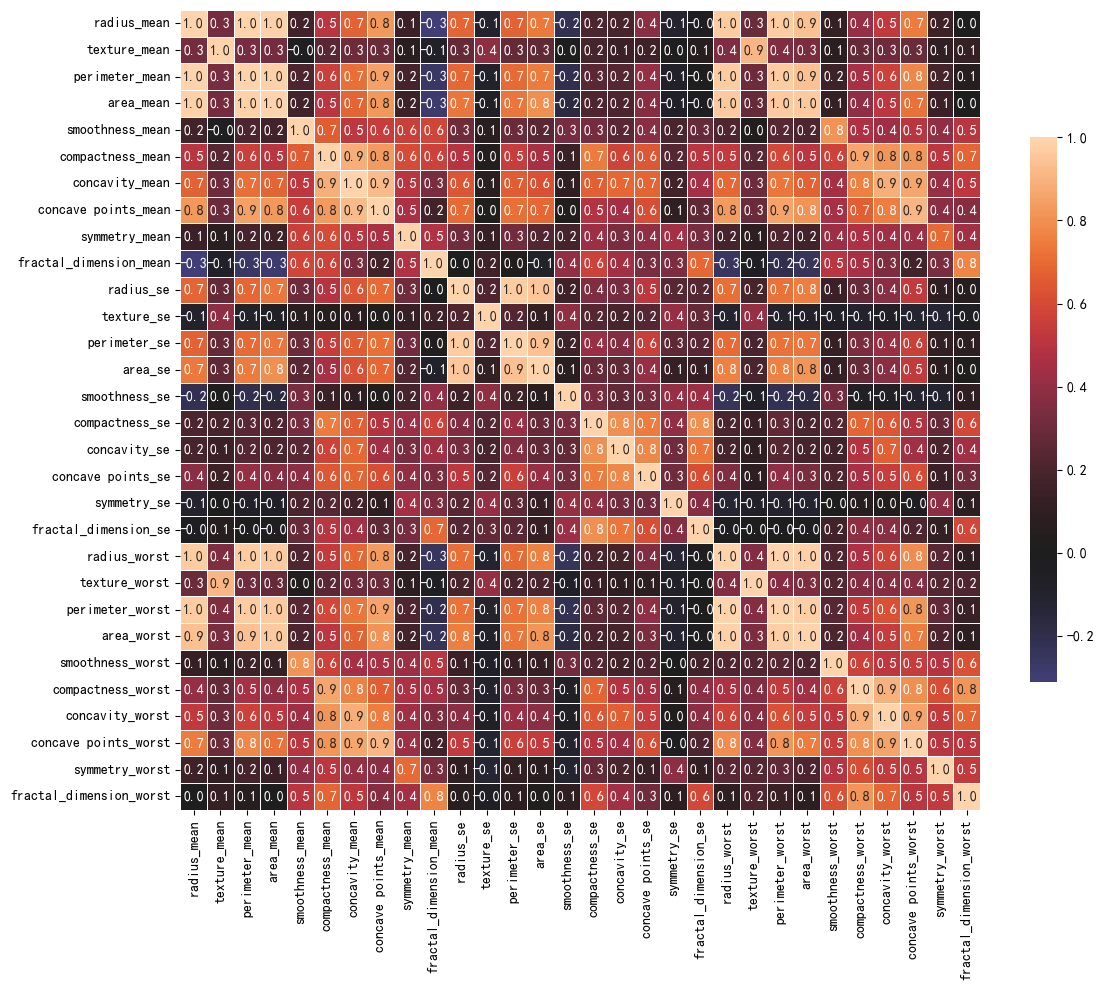

In [11]:
X_plot.corrplotting()

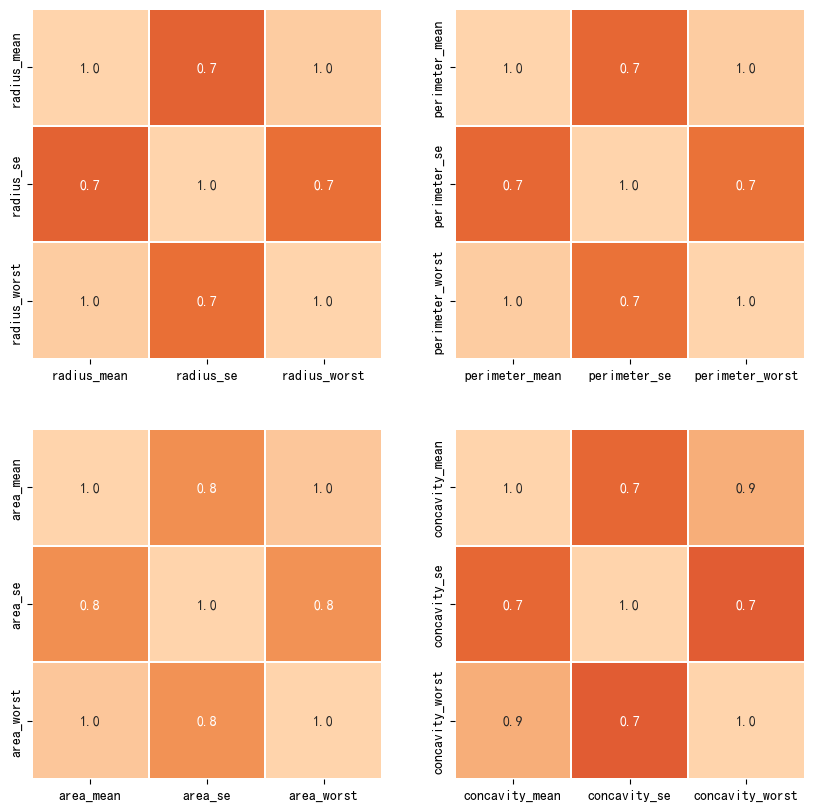

In [12]:
corrplotting_sub4(data[['radius_mean','radius_se','radius_worst']],data[['perimeter_mean','perimeter_se','perimeter_worst']],
                  data[['area_mean','area_se','area_worst']],data[['concavity_mean','concavity_se','concavity_worst']])

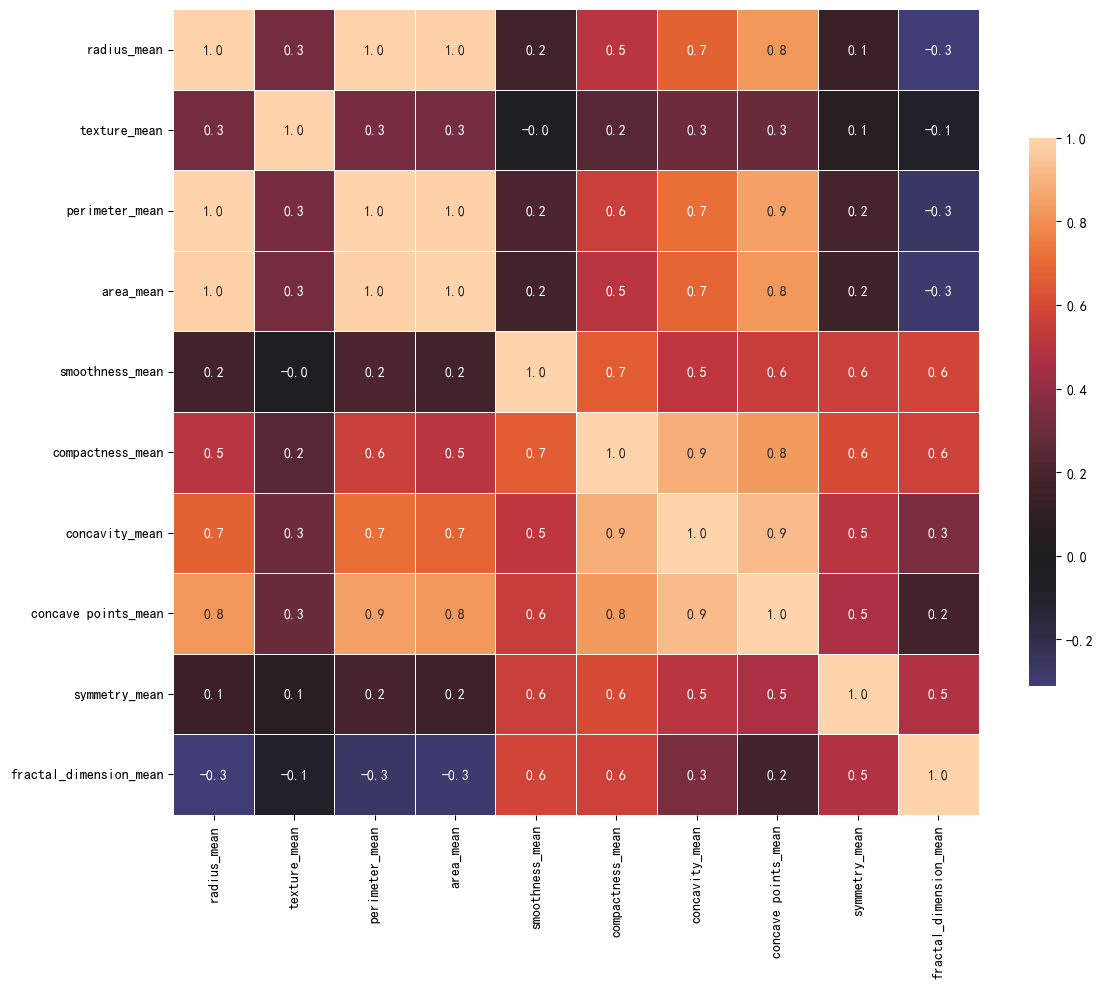

In [13]:
X_plot_mean = dataplotshow(data[list(data.columns[1:11])])
X_plot_mean.corrplotting()

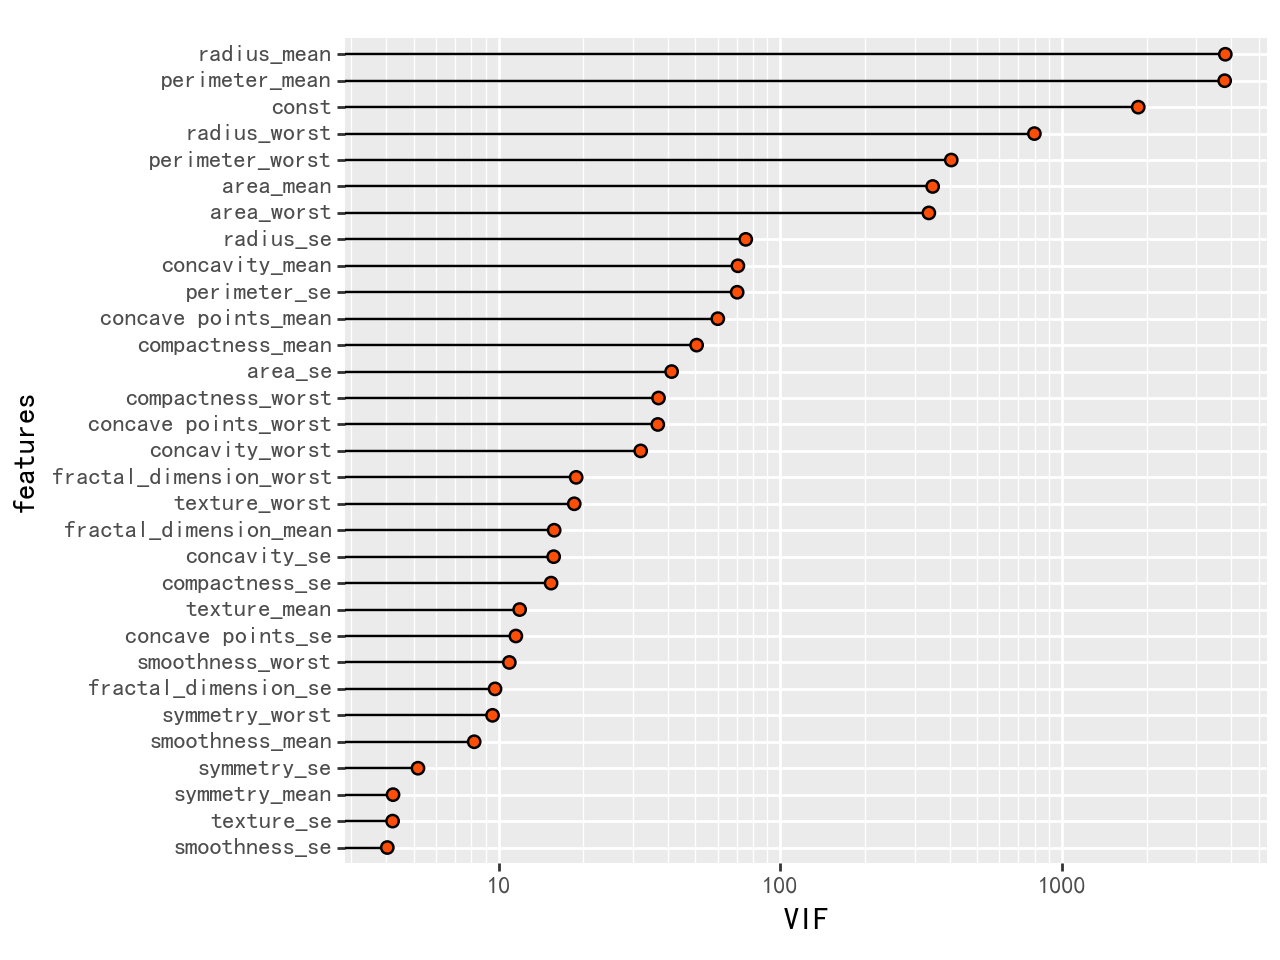

In [14]:
X_plot.vifplotting()

In [15]:
X = data[data.columns[1:]]
Y = data[data.columns[:1]]
feature_name = X.columns
#训练集和测试集划分
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#数据标准化
ss = preprocessing.StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

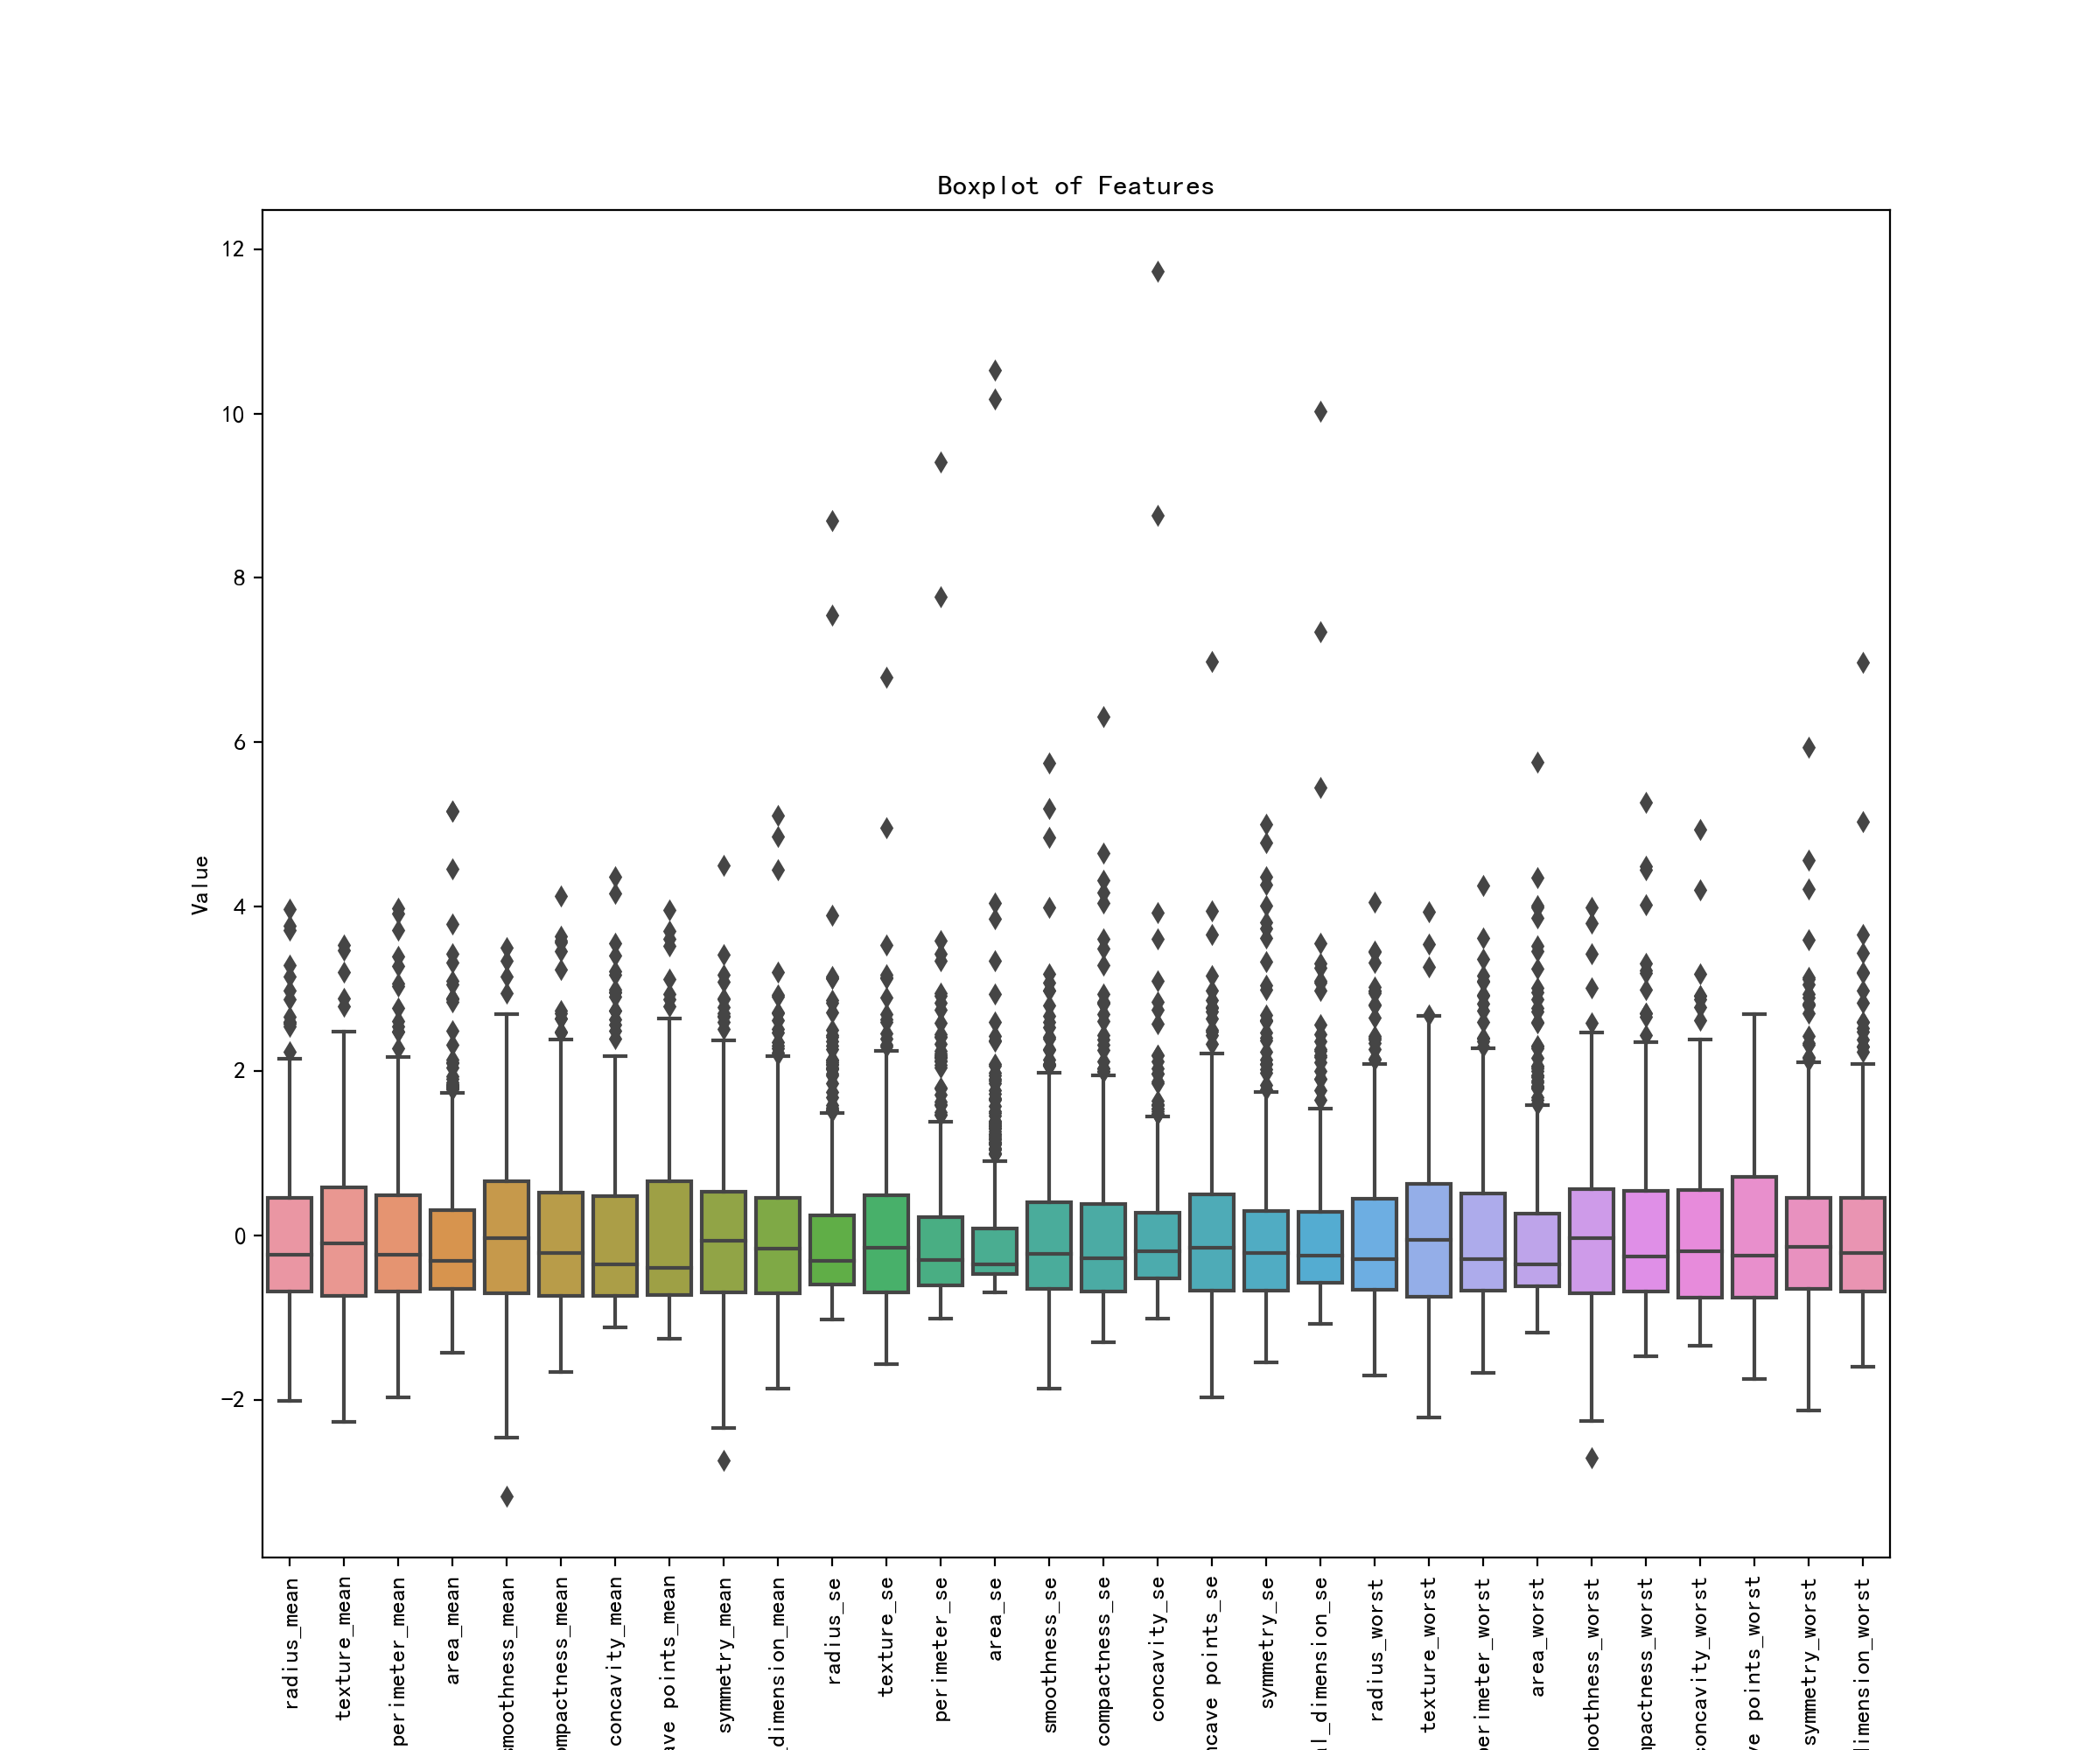

In [16]:
# 可视化异常值
x_train_plot = dataplotshow(x_train)
x_train_plot.boxplotting(feature_name)

In [17]:
#异常值处理
for i in range(x_train.shape[1]):
    Q1=np.percentile(x_train[:,i],25)#计算下四分位数
    Q3=np.percentile(x_train[:,i],75)#计算上四分位数
    up_limit=Q3+1.5*(Q3-Q1) #上限值
    low_limit=Q1-1.5*(Q3-Q1) #下限值
    for j in range(len(x_train[:,i])):
        if x_train[j,i]>up_limit or x_train[j,i]<low_limit:
            x_train[j,i] = np.median(x_train[:,i])

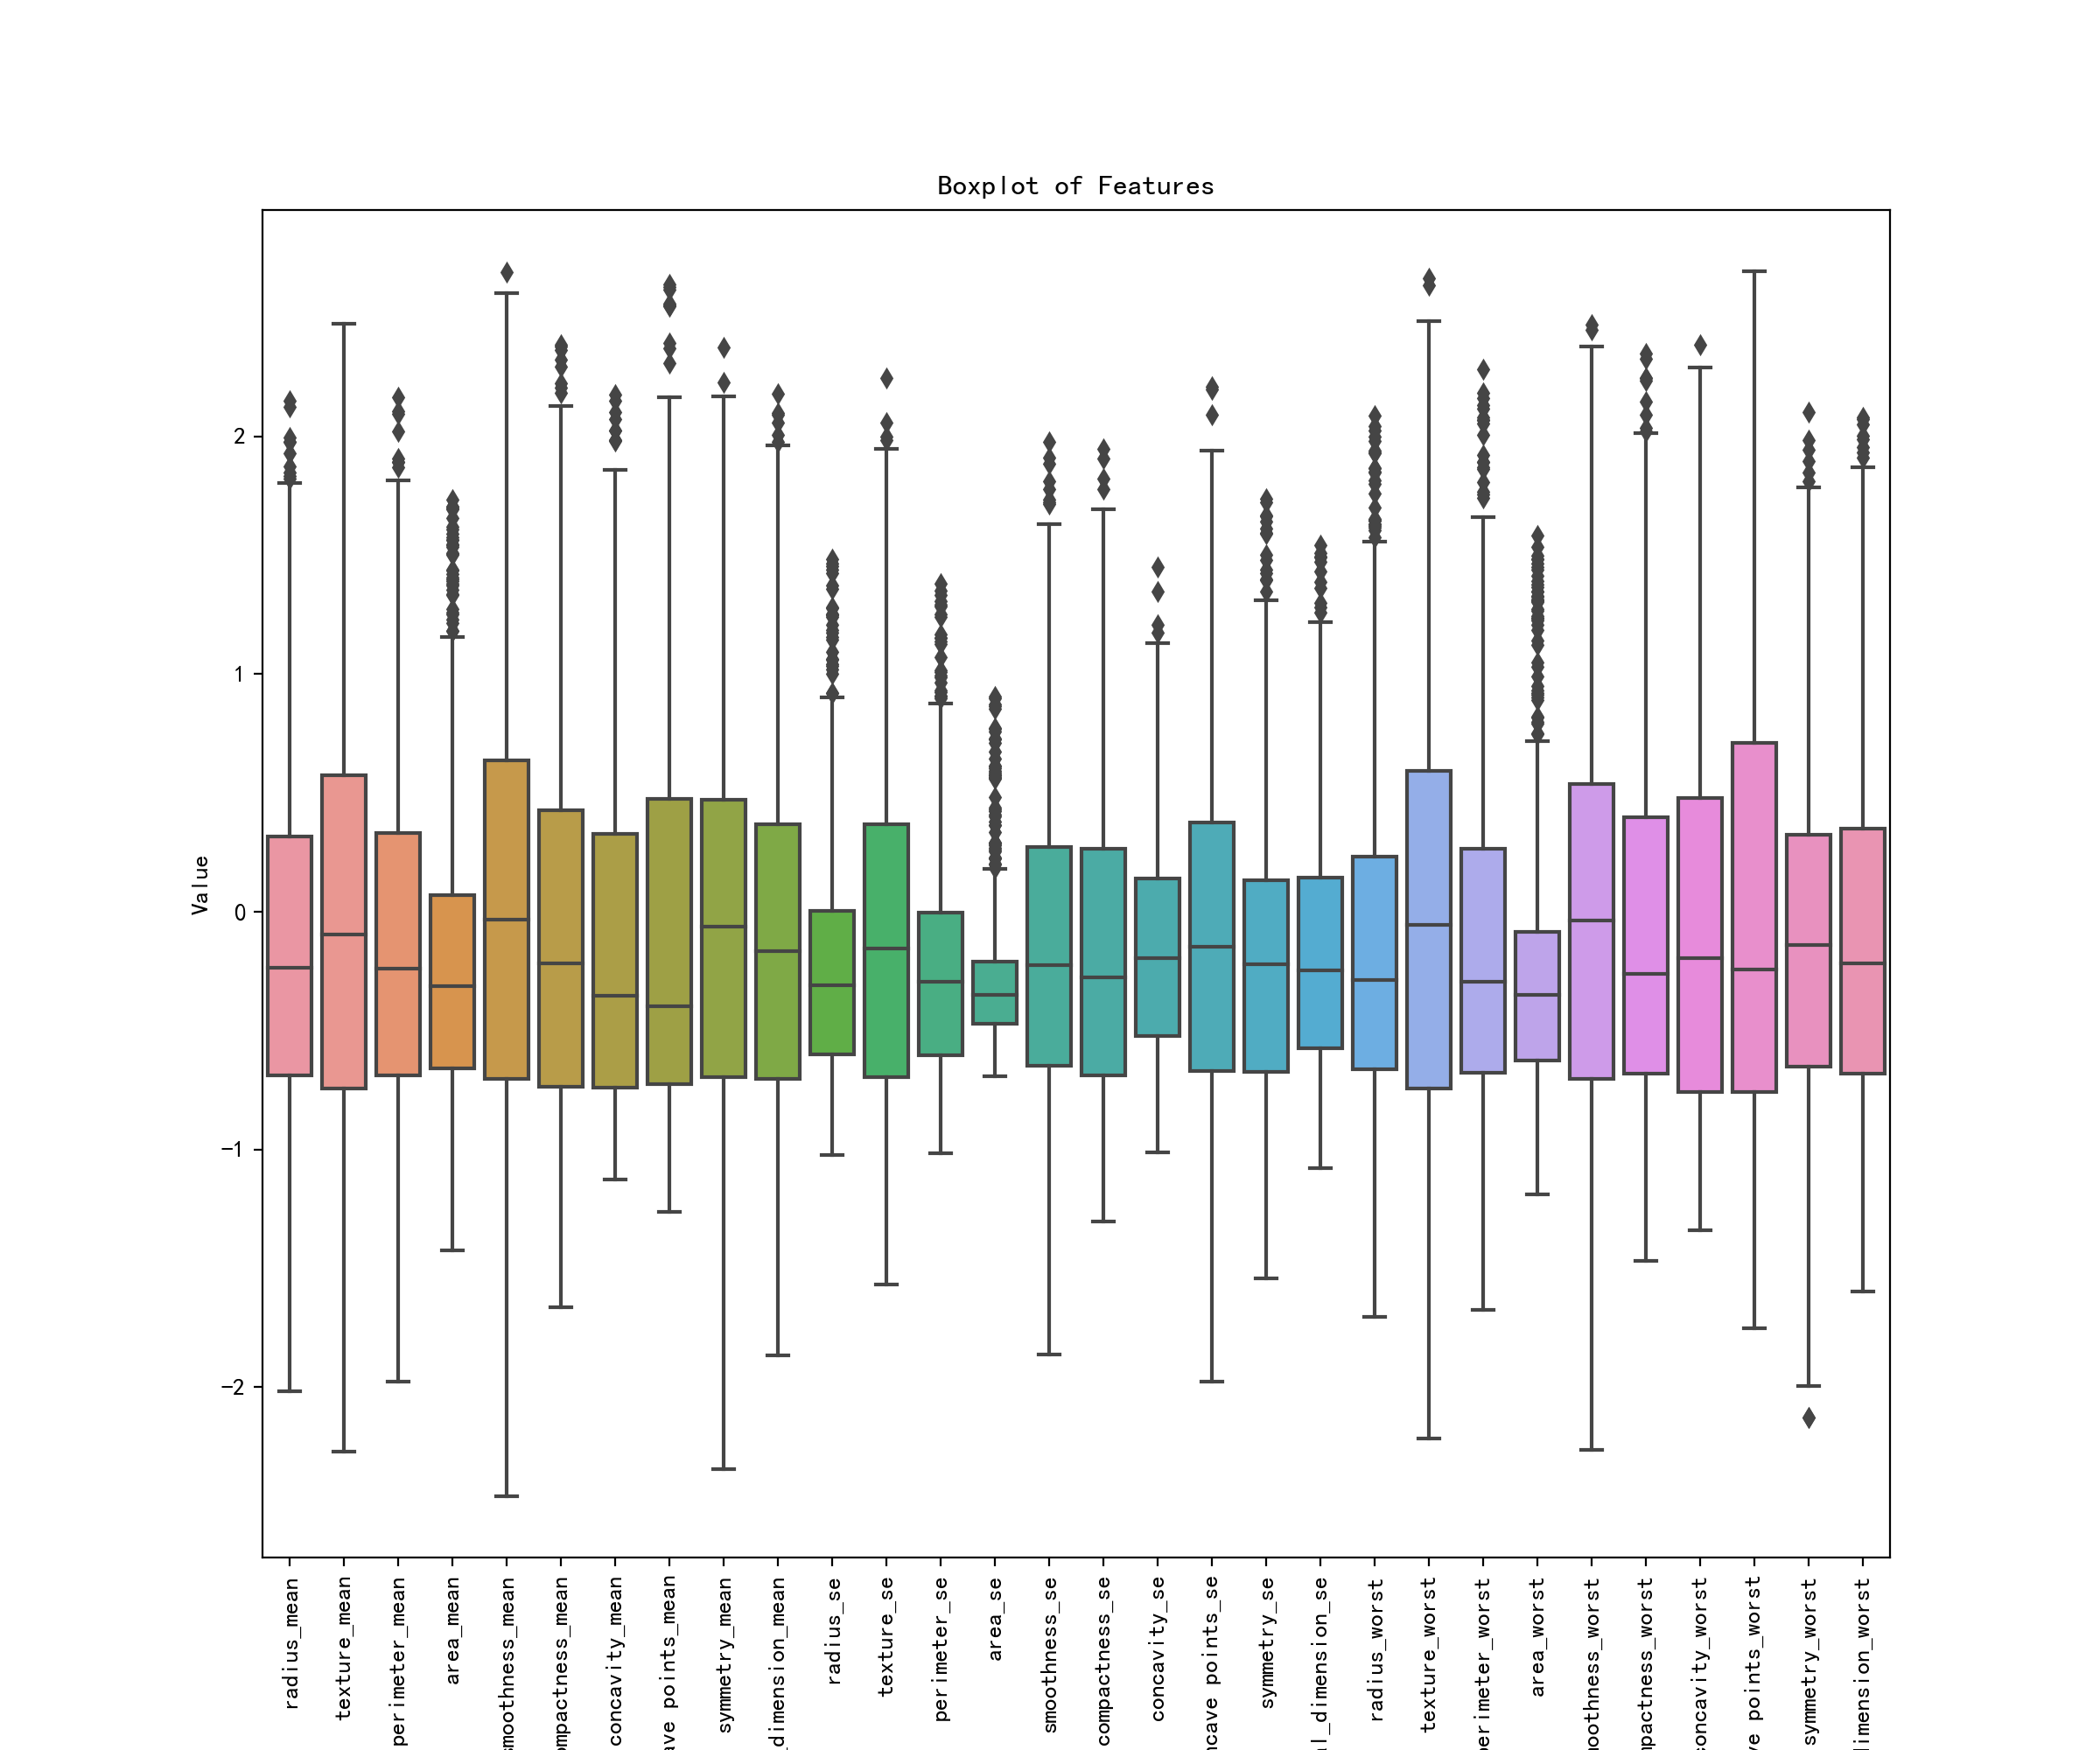

In [18]:
#异常值处理后的箱型图
x_train_plot1 = dataplotshow(x_train)
x_train_plot1.boxplotting(feature_name)

In [19]:
#模型拟合
from model_fitting import *
#逻辑回归
#超参数搜索空间
penaltys=['l1','l2']
Cs=[0.01,0.1,1,10,100,1000]

logsitic_regression_fit = logsitic_regression(x_train,y_train,x_test,y_test)
logsitic_regression_fit.best_parameters(penaltys,Cs)

[NbConvertApp] Converting notebook model_fitting.ipynb to python
[NbConvertApp] Writing 7232 bytes to model_fitting.py


best_score: 0.9715942028985507
best_params: {'C': 1, 'penalty': 'l2'}


In [20]:
logsitic_regression_fit.fitting("l2",C=1)

the coefficient of variables:
 [[ 0.32659304  1.03837473  0.23880769  0.19132809  1.09126374 -0.49027227
   0.6991443   0.41898878  0.38008947 -0.30899841  1.16907212  0.03729611
   0.40114511  0.54941519 -0.1389239  -0.83751956  0.57902729  0.25370613
  -0.82562122 -0.25065891  1.1132541   0.57082262  0.88396347  1.07678337
  -0.14439501  0.10149823  0.7826823   1.54107833  0.22488638 -0.05379998]]
the accuracy score on test: 0.956140350877193


In [21]:
#用l1进行超参数选择
penaltys=['l1']
Cs=[0.01,0.1,1,10,100,1000]
logsitic_regression_fit.best_parameters(penaltys,Cs)

best_score: 0.9627536231884057
best_params: {'C': 1, 'penalty': 'l1'}


In [22]:
logsitic_regression_fit.fitting('l1',1)

the coefficient of variables:
 [[ 0.1199652   1.32050364  0.          0.          0.85828319 -0.34110082
   0.92488501  0.          0.15168129 -0.16487408  1.87214032  0.05766008
   0.          0.          0.         -0.73497486  0.          0.
  -0.47225981  0.          1.69802396  0.22790475  0.03137481  2.43459085
   0.          0.          0.59630843  2.27168646  0.          0.        ]]
the accuracy score on test: 0.9649122807017544


In [23]:
variable = np.nonzero(logsitic_regression_fit.coef)[1]
X.columns[variable]

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'compactness_se', 'symmetry_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

In [25]:
#决策树拟合
decisiontree_fit = decision_tree(x_train,y_train,x_test,y_test,feature_name)
decisiontree_fit.fitting()
decisiontree_fit.feature_importance

the accuracy score on test: 0.9122807017543859


[('radius_mean', 0.0),
 ('texture_mean', 0.008452339486822245),
 ('perimeter_mean', 0.031718284475814214),
 ('area_mean', 0.0),
 ('smoothness_mean', 0.006339254615116683),
 ('compactness_mean', 0.0),
 ('concavity_mean', 0.0029918579177321803),
 ('concave points_mean', 0.0),
 ('symmetry_mean', 0.01648206199930338),
 ('fractal_dimension_mean', 0.0),
 ('radius_se', 0.0029248760240515636),
 ('texture_se', 0.0),
 ('perimeter_se', 0.0),
 ('area_se', 0.03362633013404006),
 ('smoothness_se', 0.0014767839539777418),
 ('compactness_se', 0.0),
 ('concavity_se', 0.0),
 ('concave points_se', 0.01648206199930338),
 ('symmetry_se', 0.0091928512800694),
 ('fractal_dimension_se', 0.0),
 ('radius_worst', 0.0),
 ('texture_worst', 0.04444329247939162),
 ('perimeter_worst', 0.014905502906303169),
 ('area_worst', 0.09305216369338082),
 ('smoothness_worst', 0.009299645087339464),
 ('compactness_worst', 0.0),
 ('concavity_worst', 0.009438445760284866),
 ('concave points_worst', 0.6928349935719526),
 ('symmetr

the best depth of the tree: 2
the best score on test: 0.9649122807017544


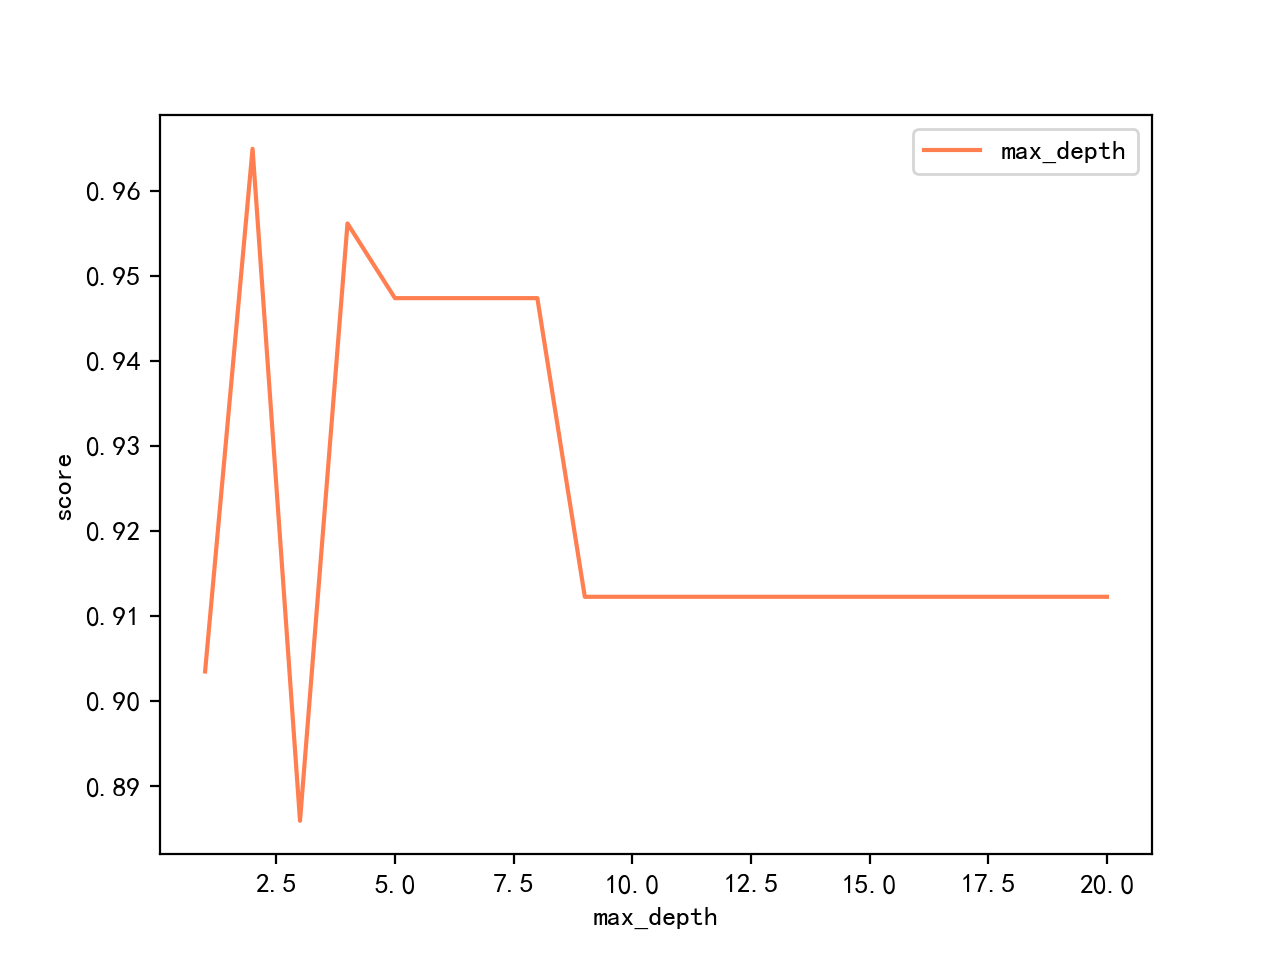

In [26]:
#调参,限制树的最大深度20，超过设定深度的树枝全部剪掉
decisiontree_fit.max_depth_finding(20)

the accuracy score on test: 0.9649122807017544


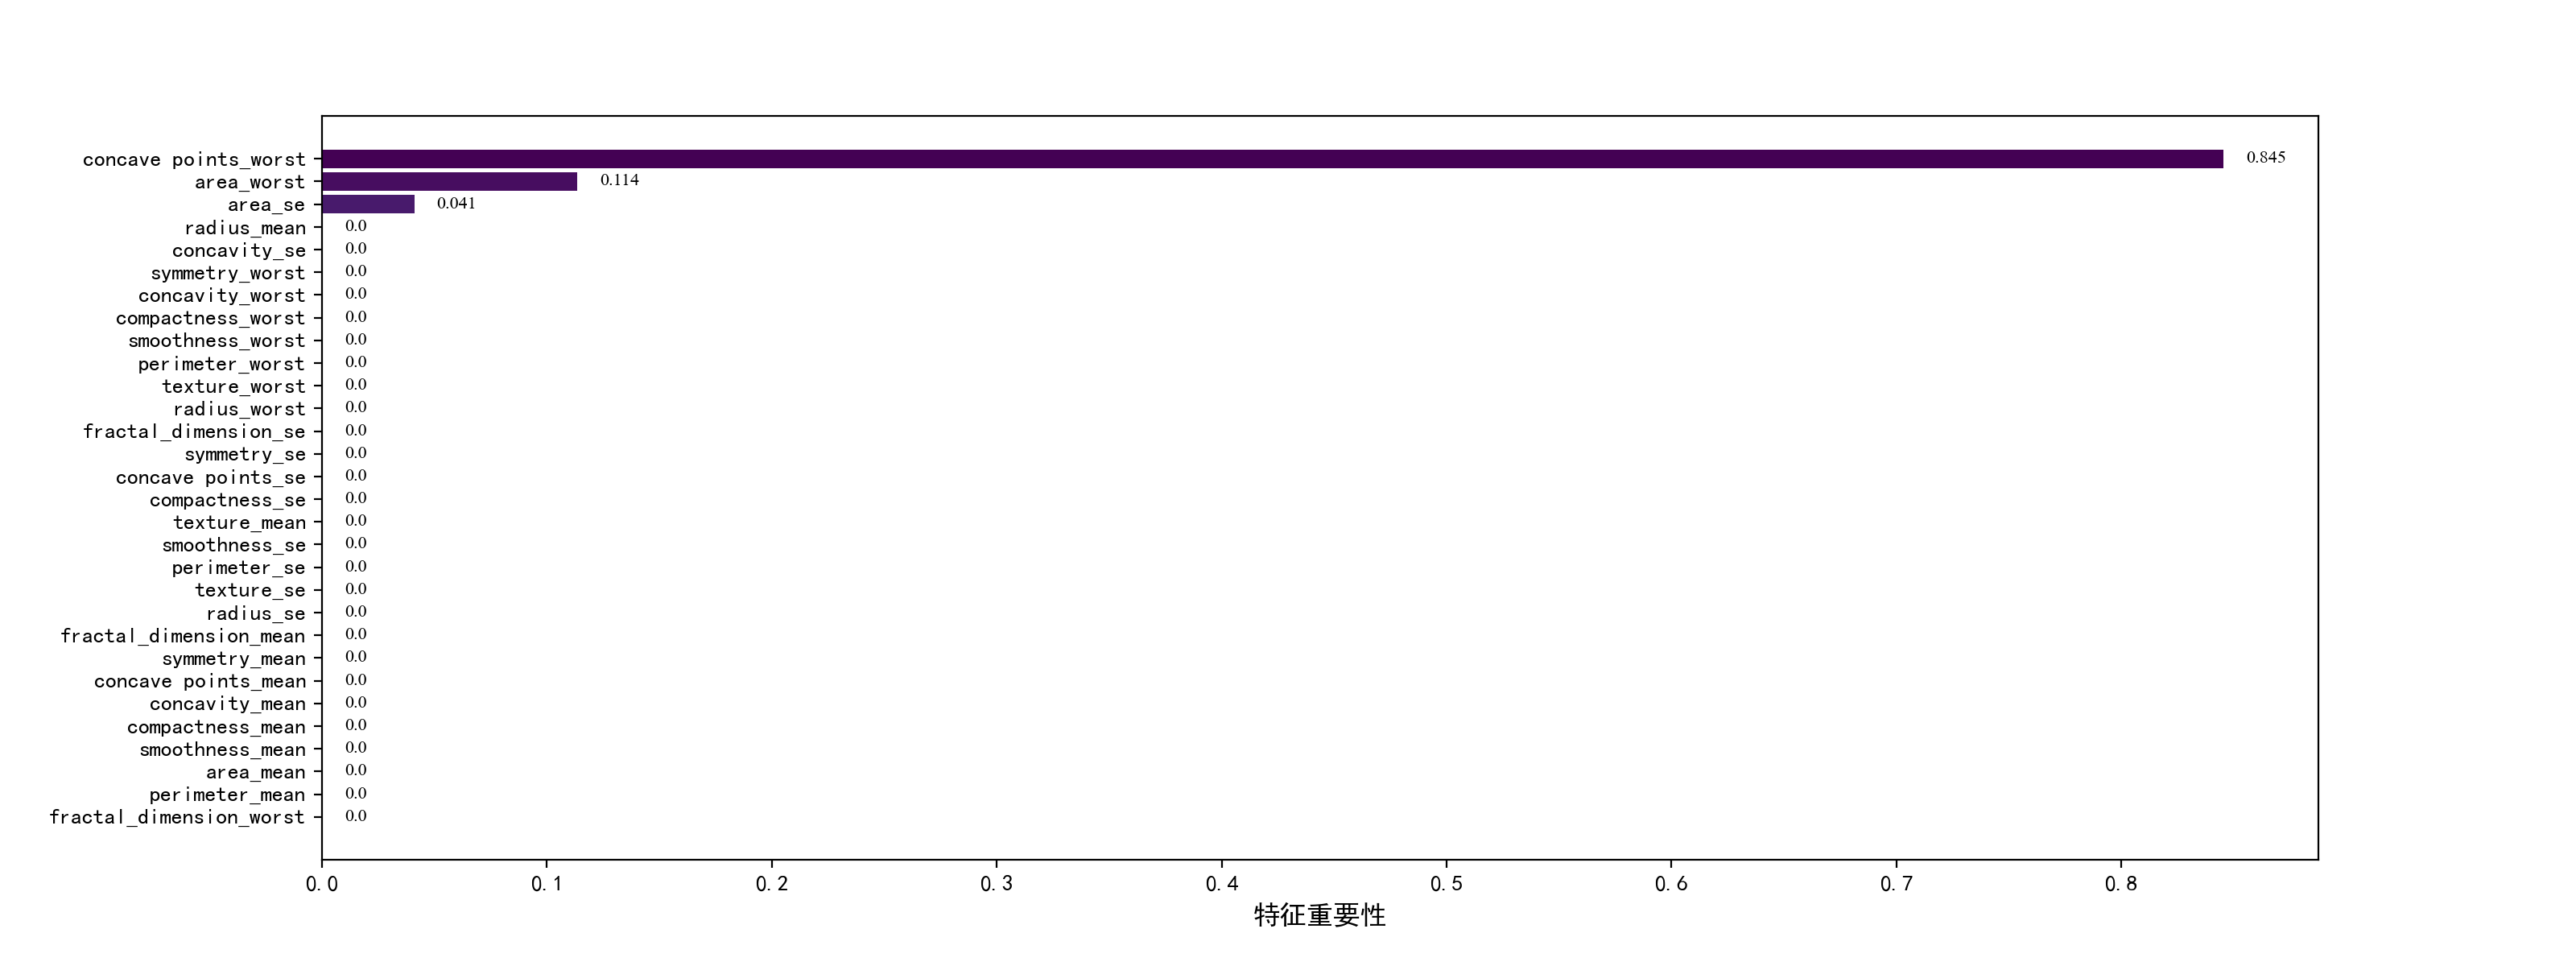

[('radius_mean', 0.0),
 ('texture_mean', 0.0),
 ('perimeter_mean', 0.0),
 ('area_mean', 0.0),
 ('smoothness_mean', 0.0),
 ('compactness_mean', 0.0),
 ('concavity_mean', 0.0),
 ('concave points_mean', 0.0),
 ('symmetry_mean', 0.0),
 ('fractal_dimension_mean', 0.0),
 ('radius_se', 0.0),
 ('texture_se', 0.0),
 ('perimeter_se', 0.0),
 ('area_se', 0.04103206432971486),
 ('smoothness_se', 0.0),
 ('compactness_se', 0.0),
 ('concavity_se', 0.0),
 ('concave points_se', 0.0),
 ('symmetry_se', 0.0),
 ('fractal_dimension_se', 0.0),
 ('radius_worst', 0.0),
 ('texture_worst', 0.0),
 ('perimeter_worst', 0.0),
 ('area_worst', 0.11354561593448641),
 ('smoothness_worst', 0.0),
 ('compactness_worst', 0.0),
 ('concavity_worst', 0.0),
 ('concave points_worst', 0.8454223197357987),
 ('symmetry_worst', 0.0),
 ('fractal_dimension_worst', 0.0)]

<Figure size 640x480 with 0 Axes>

In [27]:
decisiontree_fit.fitting(max_depth=2,feature_importance_plotting=1)
decisiontree_fit.feature_importance

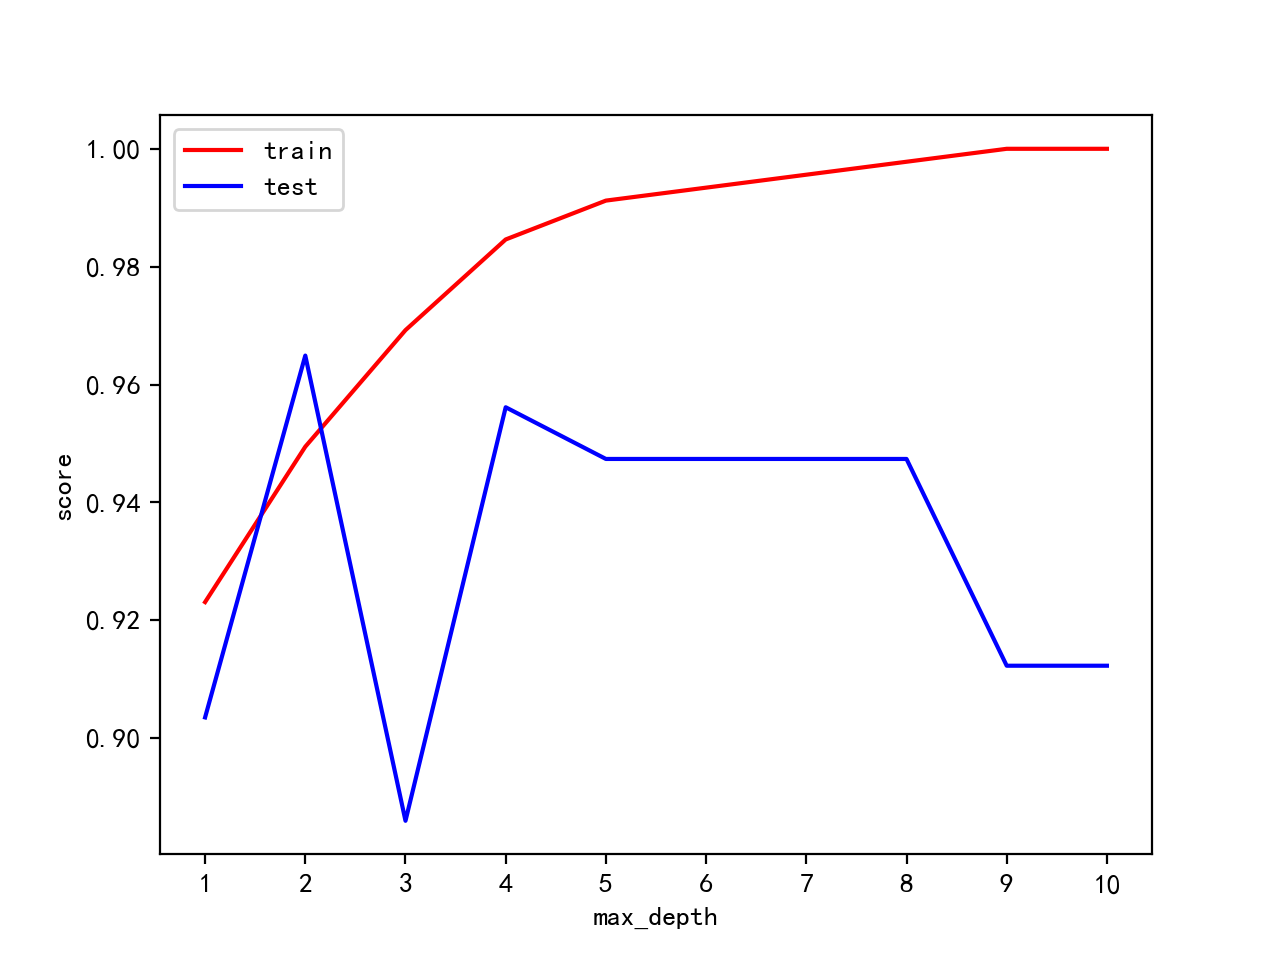

In [28]:
decisiontree_fit.score_with_depth_plotting()

the accuracy score on test: 0.956140350877193


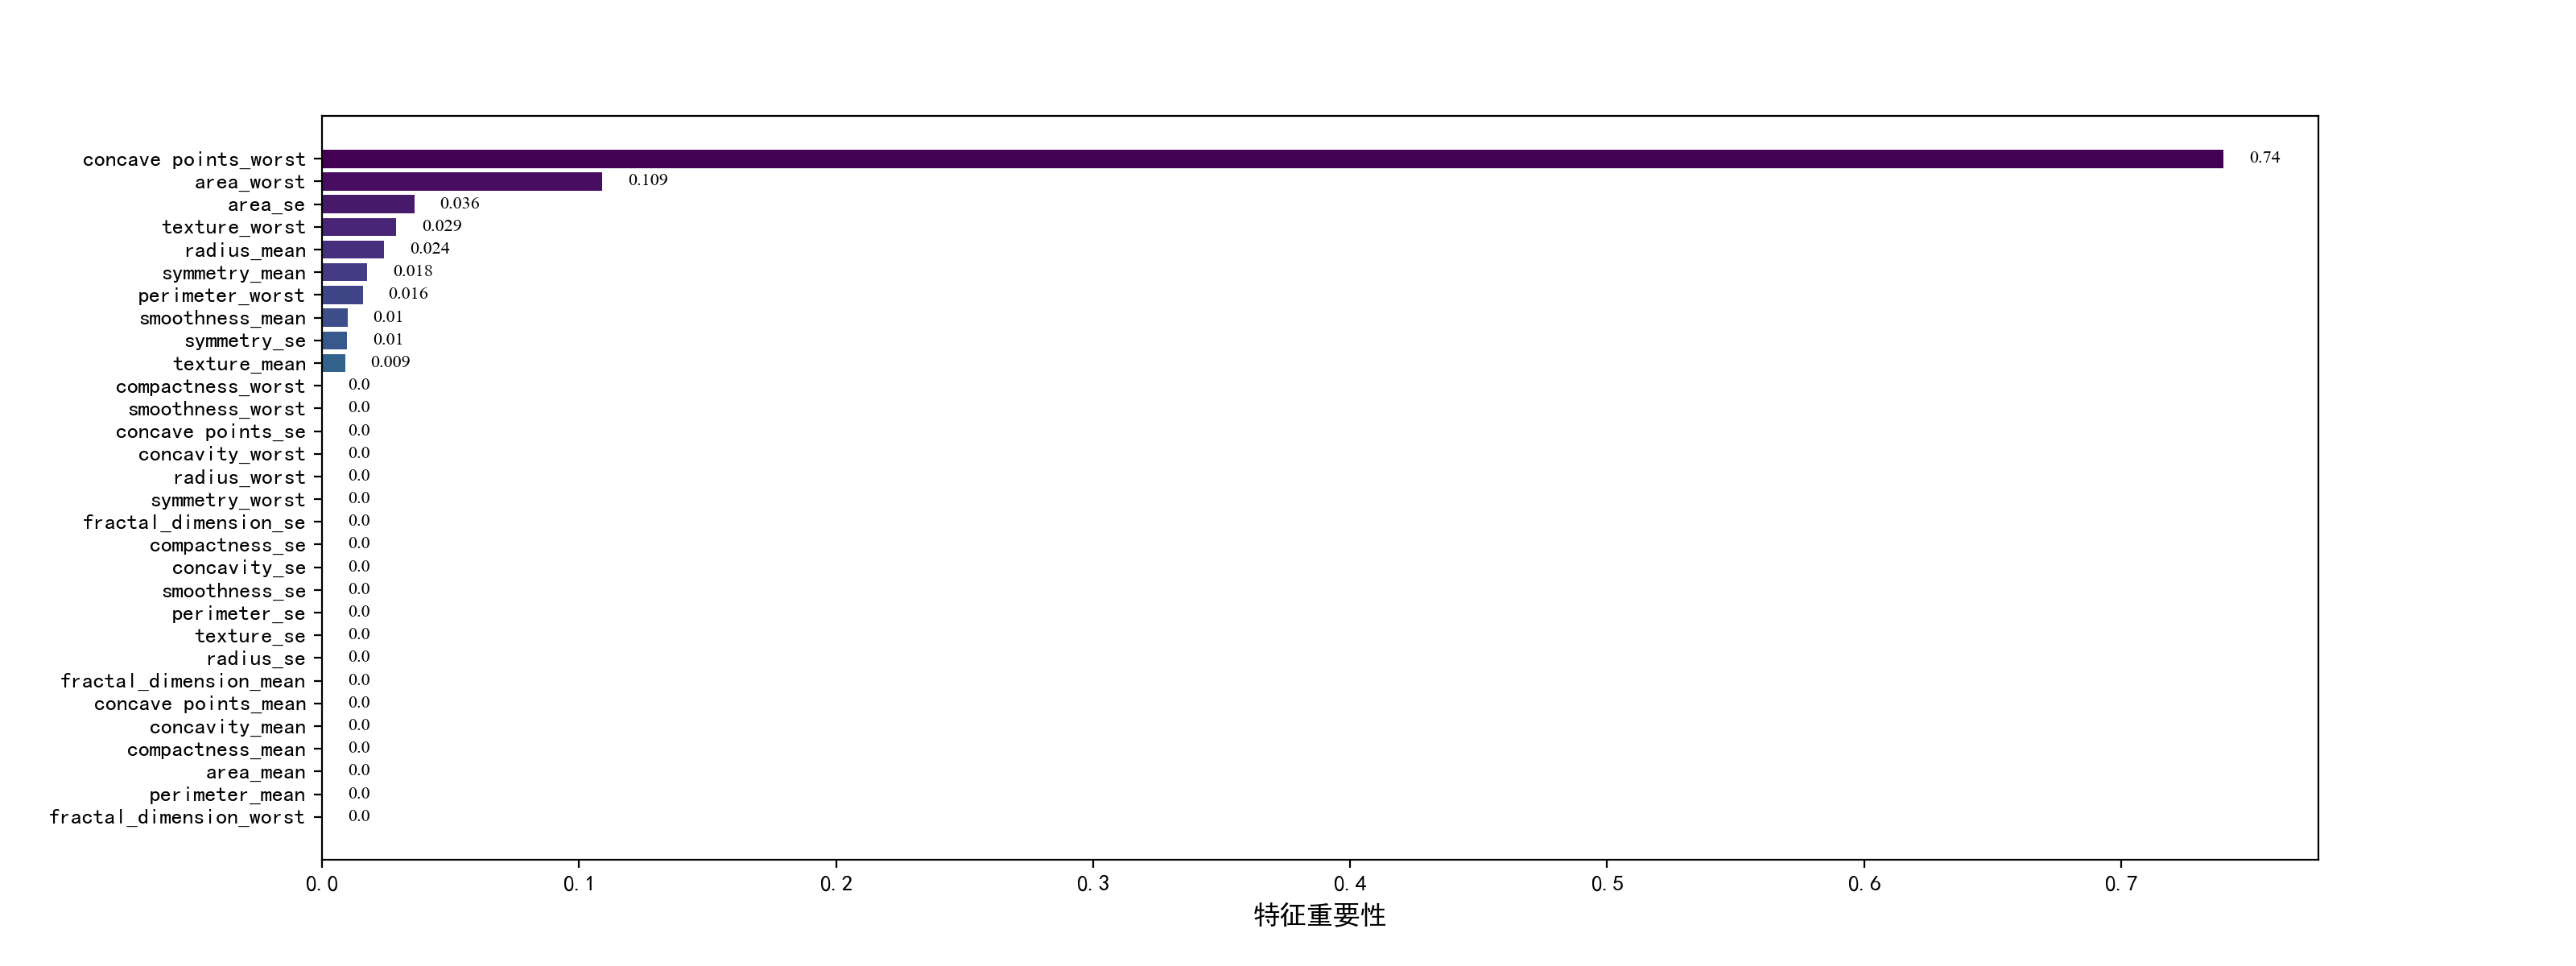

[('radius_mean', 0.02408084547535799),
 ('texture_mean', 0.009024379961179524),
 ('perimeter_mean', 0.0),
 ('area_mean', 0.0),
 ('smoothness_mean', 0.009929029815131088),
 ('compactness_mean', 0.0),
 ('concavity_mean', 0.0),
 ('concave points_mean', 0.0),
 ('symmetry_mean', 0.017597540924300076),
 ('fractal_dimension_mean', 0.0),
 ('radius_se', 0.0),
 ('texture_se', 0.0),
 ('perimeter_se', 0.0),
 ('area_se', 0.03590210500924004),
 ('smoothness_se', 0.0),
 ('compactness_se', 0.0),
 ('concavity_se', 0.0),
 ('concave points_se', 0.0),
 ('symmetry_se', 0.009815008378130293),
 ('fractal_dimension_se', 0.0),
 ('radius_worst', 0.0),
 ('texture_worst', 0.028878015875774477),
 ('perimeter_worst', 0.015914282897493647),
 ('area_worst', 0.10913386199834713),
 ('smoothness_worst', 0.0),
 ('compactness_worst', 0.0),
 ('concavity_worst', 0.0),
 ('concave points_worst', 0.7397249296650457),
 ('symmetry_worst', 0.0),
 ('fractal_dimension_worst', 0.0)]

<Figure size 640x480 with 0 Axes>

In [29]:
decisiontree_fit.fitting(max_depth=4,feature_importance_plotting=1)
decisiontree_fit.feature_importance

the best n_estimators: 25
the best score of cross_validation: 0.9666666666666666


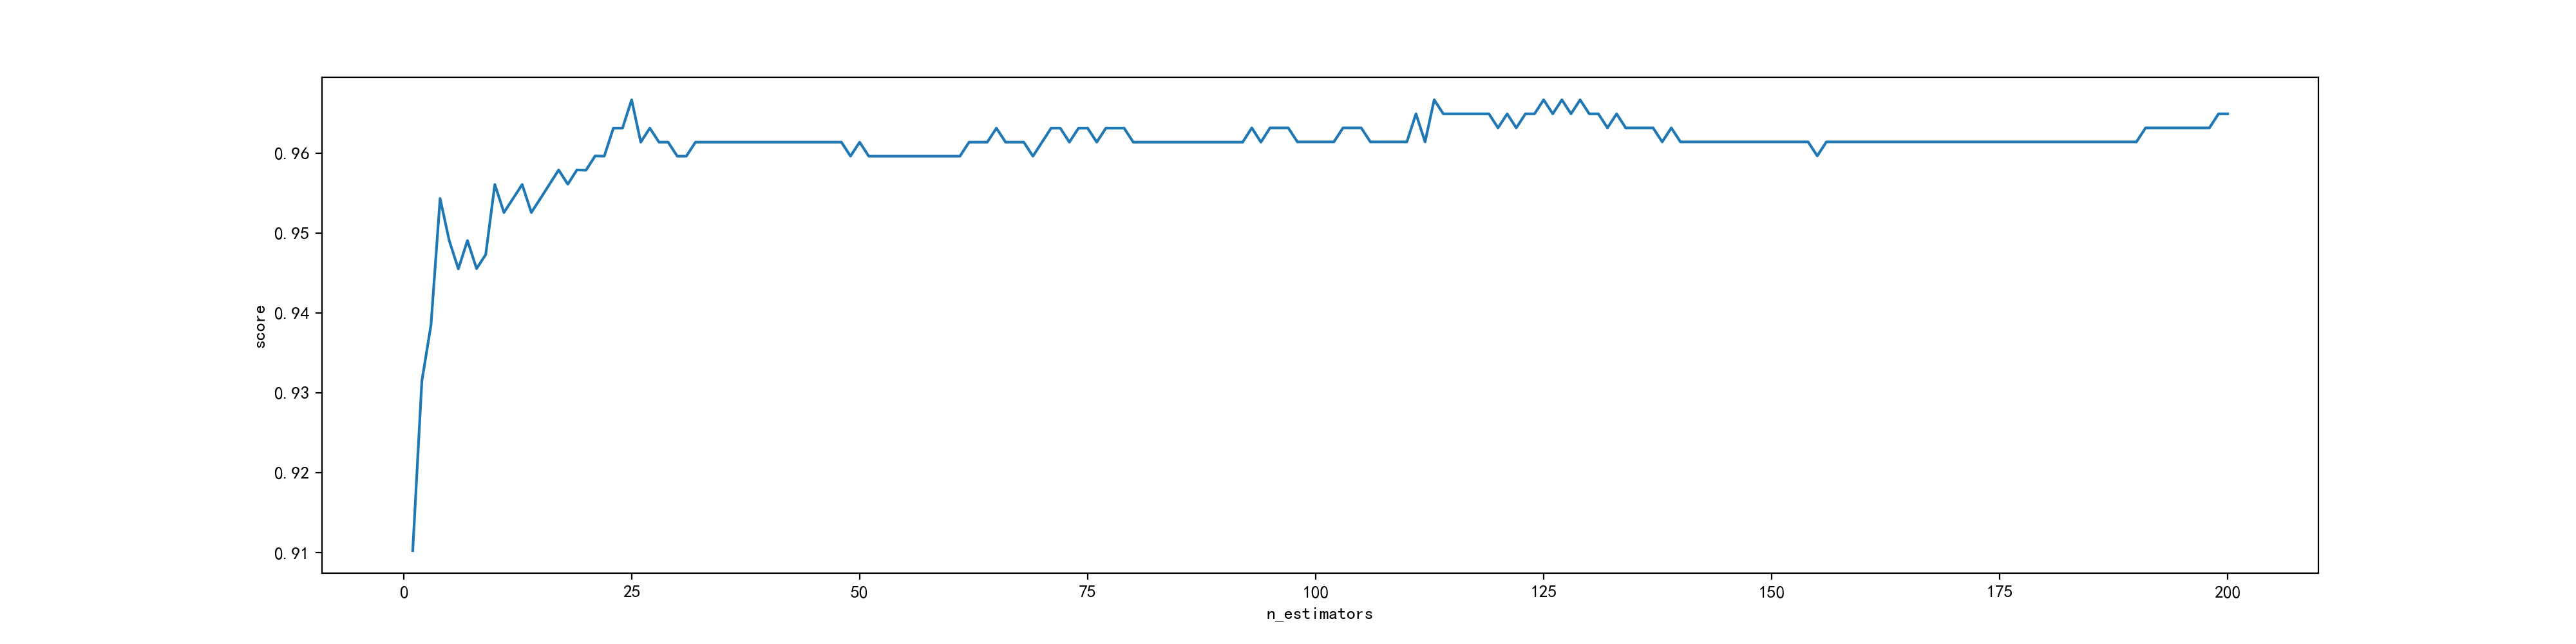

In [30]:
#随机森林
randomforest_fit = randomforest(x_train,y_train,x_test,y_test,feature_name,X,Y)
randomforest_fit.best_n_estimators(200)

the best score on test: 0.956140350877193


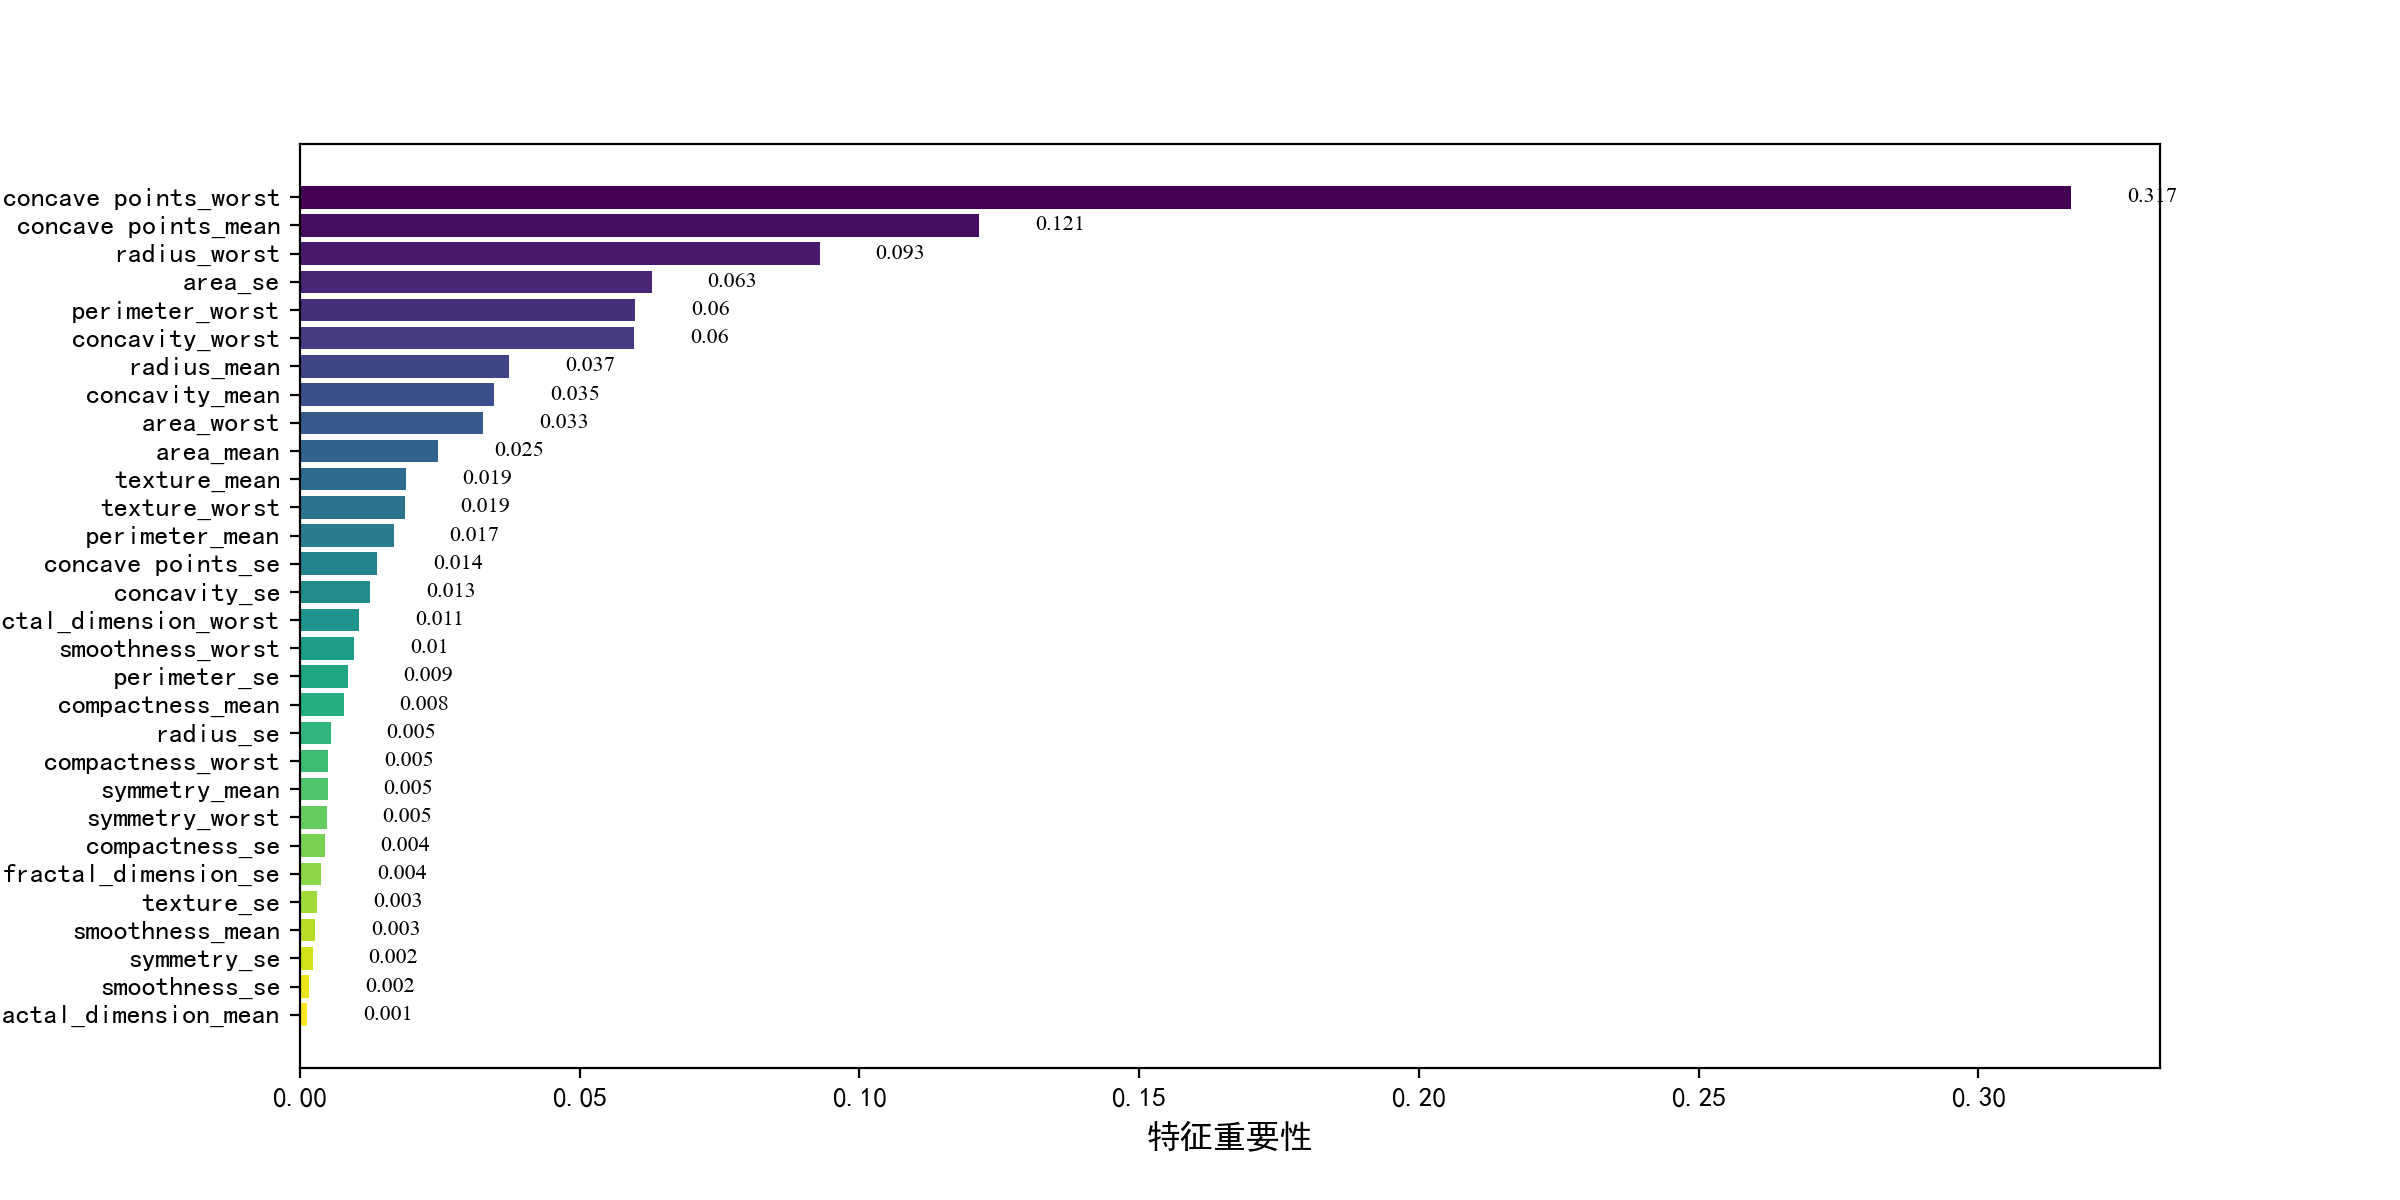

<Figure size 640x480 with 0 Axes>

In [31]:
randomforest_fit.fitting(25)

In [32]:
randomforest_fit.feature_importance

[('radius_mean', 0.03743795692842497),
 ('texture_mean', 0.019031300934387544),
 ('perimeter_mean', 0.016763072122864323),
 ('area_mean', 0.02471319117799025),
 ('smoothness_mean', 0.002744486288669906),
 ('compactness_mean', 0.007808247861784869),
 ('concavity_mean', 0.0347296055169453),
 ('concave points_mean', 0.12140158576365162),
 ('symmetry_mean', 0.004933846212398876),
 ('fractal_dimension_mean', 0.0013389153164384507),
 ('radius_se', 0.005467181071969435),
 ('texture_se', 0.0030730869192464455),
 ('perimeter_se', 0.008513972334734284),
 ('area_se', 0.06287547043403613),
 ('smoothness_se', 0.0016620962537777142),
 ('compactness_se', 0.004411216593681176),
 ('concavity_se', 0.012576615819668955),
 ('concave points_se', 0.013782703874689611),
 ('symmetry_se', 0.0022838964333707166),
 ('fractal_dimension_se', 0.003729118729657665),
 ('radius_worst', 0.09286903035750722),
 ('texture_worst', 0.018718023764321697),
 ('perimeter_worst', 0.05995462427004547),
 ('area_worst', 0.032704058